<a href="https://colab.research.google.com/github/dp1500/Algorithmic-Trading/blob/main/Only_Bollinger_Strat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('HistoricalQuotes.csv')


In [3]:
print(df["Close"].dtype)

float64


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index(ascending=True)

In [5]:
df

,Close,Volume,Open,High,Low
Date,,,,,
2010-03-01,29.86,137312041,29.3928,29.9286,29.3500
2010-03-02,29.84,141486282,29.9900,30.1186,29.6771
2010-03-03,29.90,92846488,29.8486,29.9814,29.7057
2010-03-04,30.10,89591907,29.8971,30.1314,29.8043
2010-03-05,31.28,224647427,30.7057,31.3857,30.6614
...,...,...,...,...,...
2020-02-24,298.18,55548830,297.2600,304.1800,289.2300
2020-02-25,288.08,57668360,300.9500,302.5300,286.1300
2020-02-26,292.65,49678430,286.5300,297.8800,286.5000


In [6]:
df.columns

Index(['Close', ' Volume', 'Open', 'High', 'Low'], dtype='object')

In [7]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df[' Volume'] = pd.to_numeric(df[' Volume'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')


In [8]:
print(df["Close"].dtype)

float64


In [9]:
print(df.head())
print(df['Close'].dtype)

            Close     Volume     Open     High      Low
Date                                                   
2010-03-01  29.86  137312041  29.3928  29.9286  29.3500
2010-03-02  29.84  141486282  29.9900  30.1186  29.6771
2010-03-03  29.90   92846488  29.8486  29.9814  29.7057
2010-03-04  30.10   89591907  29.8971  30.1314  29.8043
2010-03-05  31.28  224647427  30.7057  31.3857  30.6614
float64


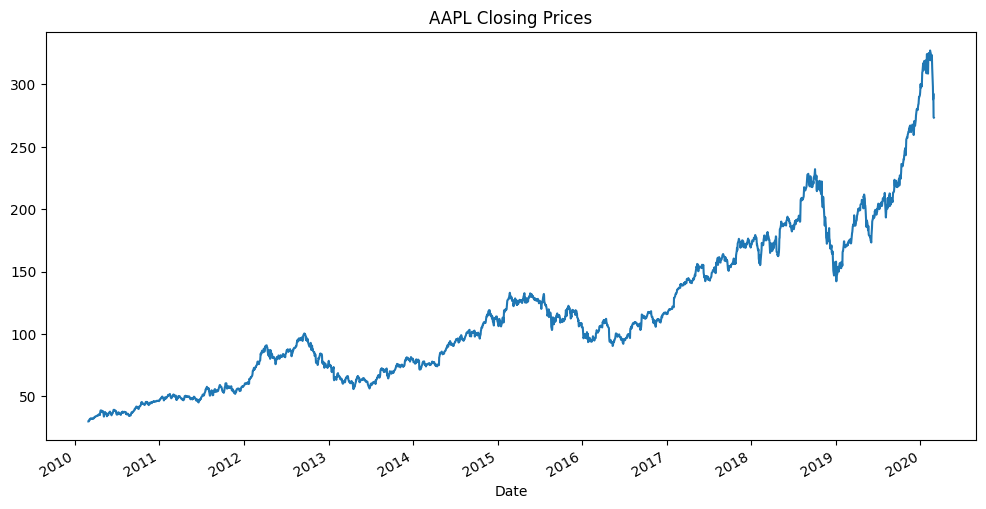

In [10]:
# Plot closing prices
df['Close'].plot(figsize=(12,6))
plt.title('AAPL Closing Prices')
plt.show()

## Bollinger band



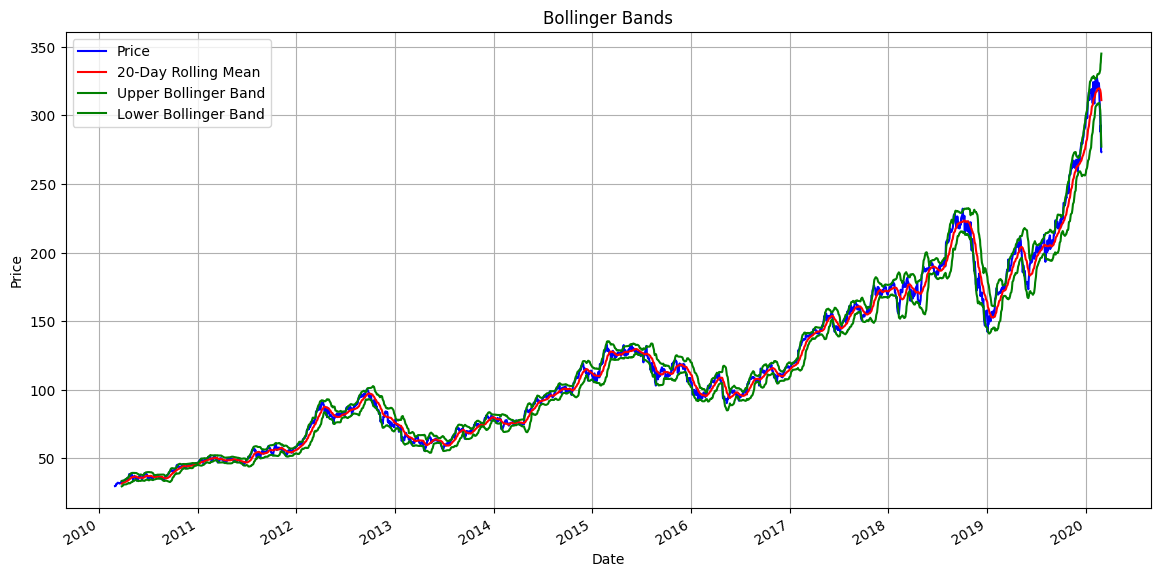

In [11]:

# Calculate the Bollinger Bands
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()
df['Upper'] = rolling_mean + (rolling_std * 2)
df['Lower'] = rolling_mean - (rolling_std * 2)

# Plotting
plt.figure(figsize=(14, 7))
df['Close'].plot(color='blue', label='Price')
rolling_mean.plot(color='red', label='20-Day Rolling Mean')
df['Upper'].plot(color='green', label='Upper Bollinger Band')
df['Lower'].plot(color='green', label='Lower Bollinger Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### bolinger for last 100 days


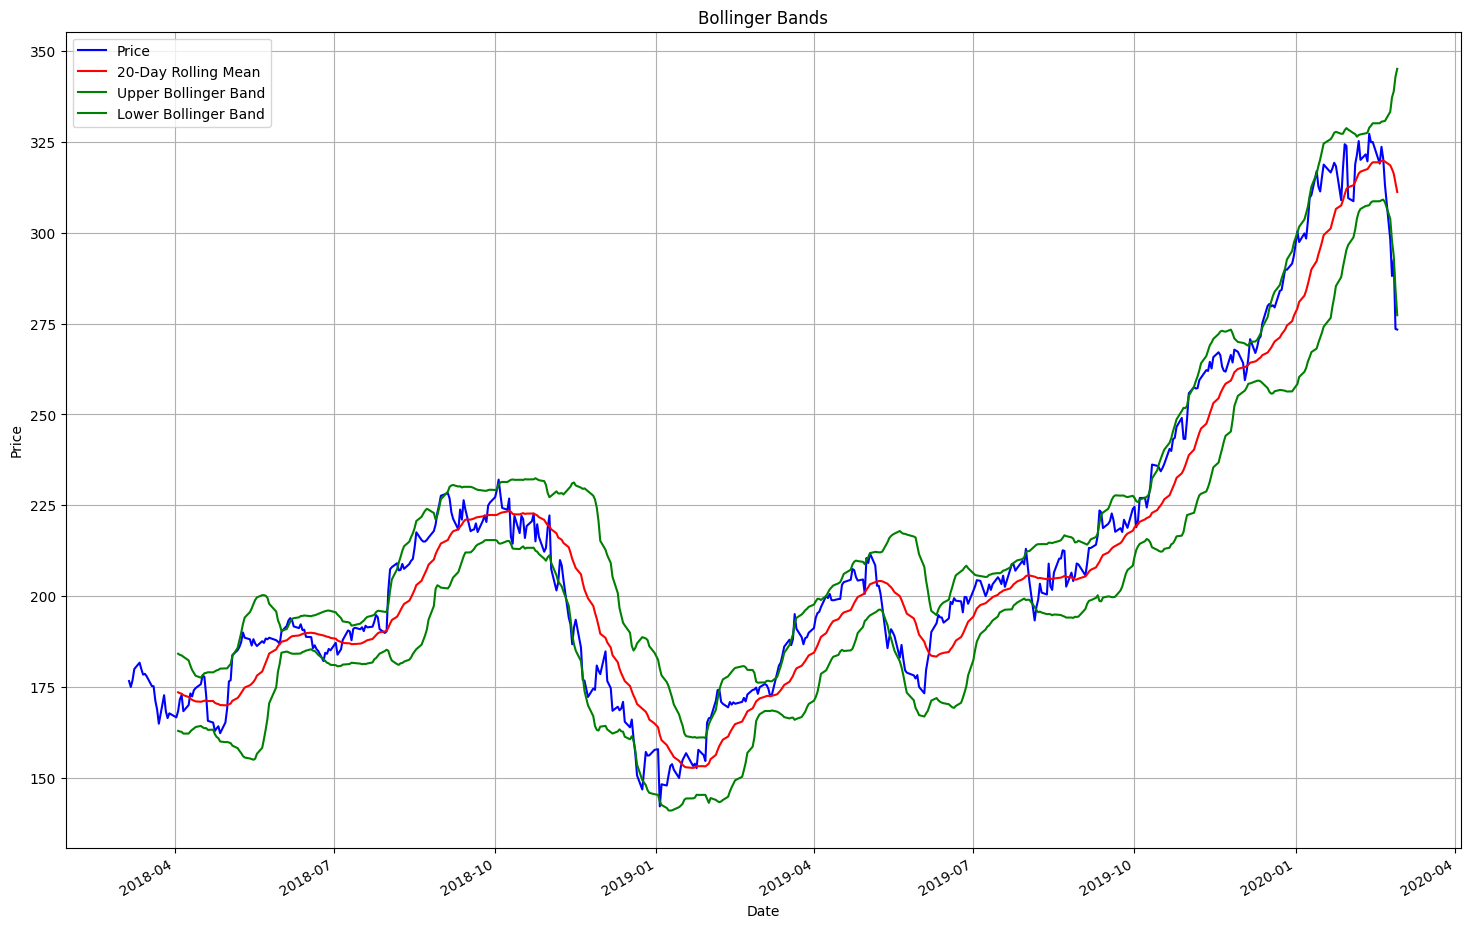

In [12]:

# Calculate the Bollinger Bands
df1 = df.tail(500).copy()
rolling_mean = df1['Close'].rolling(window=20).mean()
rolling_std = df1['Close'].rolling(window=20).std()
df1['Upper'] = rolling_mean + (rolling_std * 2)
df1['Lower'] = rolling_mean - (rolling_std * 2)

# Plotting
plt.figure(figsize=(18, 12))
df1['Close'].plot(color='blue', label='Price')
rolling_mean.plot(color='red', label='20-Day Rolling Mean')
df1['Upper'].plot(color='green', label='Upper Bollinger Band')
df1['Lower'].plot(color='green', label='Lower Bollinger Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# creating dataframes copies to fing optimum average periods
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

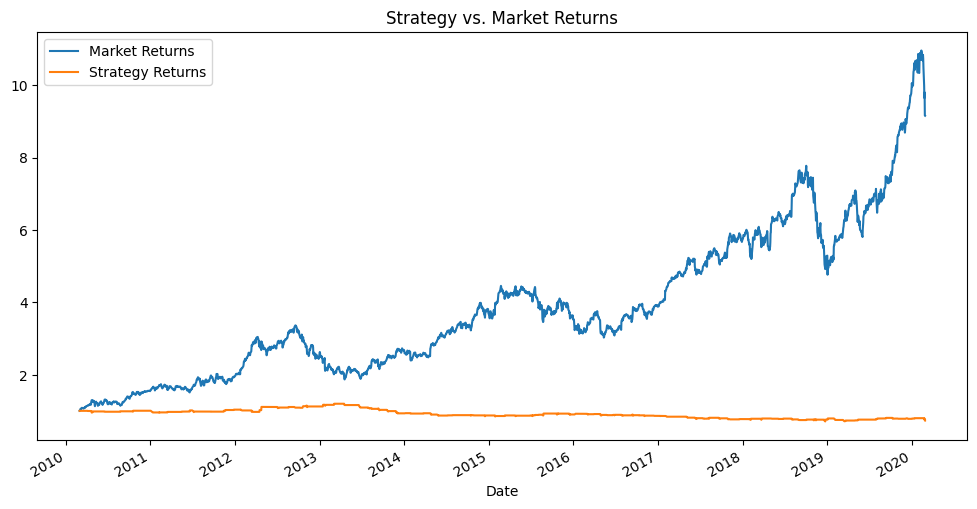

In [14]:

rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()
df['Upper'] = rolling_mean + (rolling_std * 2)
df['Lower'] = rolling_mean - (rolling_std * 2)

df['Signal'] = 0
df.loc[df['Close'] > df['Upper'], 'Signal'] = -1  # Sell
df.loc[df['Close'] < df['Lower'], 'Signal'] = 1   # Buy

# Backtest by calculating returns
df['Daily_Return'] = df['Close'].pct_change()
df['Strategy_Return'] = df['Signal'].shift(1) * df['Daily_Return']

# Calculate cumulative returns
cumulative_strategy_returns = (df['Strategy_Return'] + 1).cumprod()
cumulative_market_returns = (df['Daily_Return'] + 1).cumprod()

# Plotting the strategy vs. market returns
plt.figure(figsize=(12,6))
cumulative_market_returns.plot(label='Market Returns', legend=True)
cumulative_strategy_returns.plot(label='Strategy Returns', legend=True)
plt.title('Strategy vs. Market Returns')
plt.show()

In [15]:
# import pandas as pd
from scipy.stats import skew, kurtosis

def print_strategy_metrics(df):
    # Max Drawdown
    def max_drawdown(returns_series):
        cumulative_returns = (1 + returns_series).cumprod()
        rolling_max = cumulative_returns.cummax()
        drawdowns = (cumulative_returns - rolling_max) / rolling_max
        return drawdowns.min()

    # Cumulative Returns
    final_cumulative_strategy_return = (df['Strategy_Return'] + 1).cumprod().iloc[-1] - 1
    final_cumulative_market_return = (df['Daily_Return'] + 1).cumprod().iloc[-1] - 1

    # Annualized Returns
    annualized_strategy_return = (1 + df['Strategy_Return'].mean())**252 - 1
    annualized_market_return = (1 + df['Daily_Return'].mean())**252 - 1

    # Annualized Volatility
    annualized_strategy_volatility = df['Strategy_Return'].std() * (252**0.5)
    annualized_market_volatility = df['Daily_Return'].std() * (252**0.5)

    # Skewness & Kurtosis
    strategy_skewness = skew(df['Strategy_Return'].dropna())
    strategy_kurtosis = kurtosis(df['Strategy_Return'].dropna())

    # VaR (95% one-day VaR)
    var_95 = df['Strategy_Return'].quantile(0.05)


    # Sharpe Ratio
    risk_free_rate = 0.0
    sharpe_ratio = (annualized_strategy_return - risk_free_rate) / annualized_strategy_volatility

    # Sortino Ratio
    downside_volatility = df[df['Strategy_Return'] < 0]['Strategy_Return'].std() * (252**0.5)
    sortino_ratio = (annualized_strategy_return - risk_free_rate) / downside_volatility

    # Beta
    cov_matrix = df[['Strategy_Return', 'Daily_Return']].cov()
    beta = cov_matrix.iloc[0, 1] / df['Daily_Return'].var()

    # Print Metrics
    print(f"Final Cumulative Strategy Return: {final_cumulative_strategy_return:.2%}")
    print(f"Final Cumulative Market Return: {final_cumulative_market_return:.2%}")
    print(f"Annualized Strategy Return: {annualized_strategy_return:.2%}")
    print(f"Annualized Market Return: {annualized_market_return:.2%}")
    print(f"Annualized Strategy Volatility: {annualized_strategy_volatility:.2%}")
    print(f"Annualized Market Volatility: {annualized_market_volatility:.2%}")
    print(f"Strategy Max Drawdown: {max_drawdown(df['Strategy_Return']):.2%}")
    print(f"Strategy Skewness: {strategy_skewness:.2f}")
    print(f"Strategy Kurtosis: {strategy_kurtosis:.2f}")
    print(f"Strategy 95% 1-day VaR: {var_95:.2%}")
    print(f"Strategy Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Strategy Sortino Ratio: {sortino_ratio:.2f}")
    print(f"Strategy Beta: {beta:.2f}")


# Call the function
print_strategy_metrics(df)

Final Cumulative Strategy Return: -26.90%
Final Cumulative Market Return: 815.47%
Annualized Strategy Return: -2.65%
Annualized Market Return: 29.06%
Annualized Strategy Volatility: 9.58%
Annualized Market Volatility: 25.83%
Strategy Max Drawdown: -40.86%
Strategy Skewness: 1.84
Strategy Kurtosis: 50.23
Strategy 95% 1-day VaR: -0.37%
Strategy Sharpe Ratio: -0.28
Strategy Sortino Ratio: -0.16
Strategy Beta: 0.05
